In [152]:

# predict a plant's petal width with linear regression

# based on formula from https://www.stat.purdue.edu/~boli/stat512/lectures/topic3.pdf

# numpy docs for linear algebra specifically: https://numpy.org/doc/stable/reference/routines.linalg.html

# inverse of a matrix: if you multiply it by original matrix you get identity matrix
# this is different to getting x^-1 all numbers in matrix (though it's often written as A^-1, which
# has this other meaning in the world of matrices)
# for more on this: https://www.mathsisfun.com/algebra/matrix-inverse.html

import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
data = data.to_numpy()

data = data[:, :4]   # dropping species column
data = np.hstack([np.array([1]*150).reshape(150,1), data])  # adding intercept column

array([[1, 5.1, 3.5, 1.4, 0.2],
       [1, 4.9, 3.0, 1.4, 0.2],
       [1, 4.7, 3.2, 1.3, 0.2],
       [1, 4.6, 3.1, 1.5, 0.2],
       [1, 5.0, 3.6, 1.4, 0.2],
       [1, 5.4, 3.9, 1.7, 0.4],
       [1, 4.6, 3.4, 1.4, 0.3],
       [1, 5.0, 3.4, 1.5, 0.2],
       [1, 4.4, 2.9, 1.4, 0.2],
       [1, 4.9, 3.1, 1.5, 0.1],
       [1, 5.4, 3.7, 1.5, 0.2],
       [1, 4.8, 3.4, 1.6, 0.2],
       [1, 4.8, 3.0, 1.4, 0.1],
       [1, 4.3, 3.0, 1.1, 0.1],
       [1, 5.8, 4.0, 1.2, 0.2],
       [1, 5.7, 4.4, 1.5, 0.4],
       [1, 5.4, 3.9, 1.3, 0.4],
       [1, 5.1, 3.5, 1.4, 0.3],
       [1, 5.7, 3.8, 1.7, 0.3],
       [1, 5.1, 3.8, 1.5, 0.3],
       [1, 5.4, 3.4, 1.7, 0.2],
       [1, 5.1, 3.7, 1.5, 0.4],
       [1, 4.6, 3.6, 1.0, 0.2],
       [1, 5.1, 3.3, 1.7, 0.5],
       [1, 4.8, 3.4, 1.9, 0.2],
       [1, 5.0, 3.0, 1.6, 0.2],
       [1, 5.0, 3.4, 1.6, 0.4],
       [1, 5.2, 3.5, 1.5, 0.2],
       [1, 5.2, 3.4, 1.4, 0.2],
       [1, 4.7, 3.2, 1.6, 0.2],
       [1, 4.8, 3.1, 1.6, 0.2],
       [

In [153]:
train_input = data[:120, :4]
train_labs = data[:120, 4:]

test_input = data[120:, :4]
test_labs = data[120:, 4:]

In [164]:
# find coefficients using training data
coefficients = np.linalg.inv(x).dot(train_input.T).dot(train_labs)
coefficients

array([[-0.18899170237840096],
       [-0.18929402084413094],
       [0.18960984808435147],
       [0.5027263623805672]], dtype=object)

coefficients [[-0.18899170237840096]
 [-0.18929402084413094]
 [0.18960984808435147]
 [0.5027263623805672]]
r squared of 0.0002396864189618504


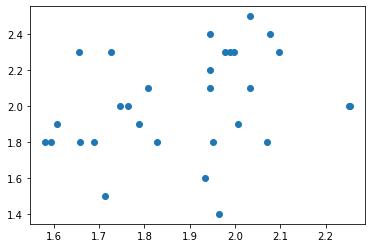

In [162]:
# predict values on test data
print('coefficients ' + str(coefficients))

predictions = np.matmul(test_input, coefficients)
plt.scatter(predictions, test_labs)

for_cov = np.c_[predictions.astype(float), test_labs.astype(float)]
print('r squared of ' + str(np.cov(for_cov, rowvar=False)[0, 1]**2))

In [156]:
# train regression with sklearn
reg = LinearRegression().fit(train_input, train_labs)

coefficients [[ 0.         -0.18929402  0.18960985  0.50272636]]
r squared of 0.00023968641896182885


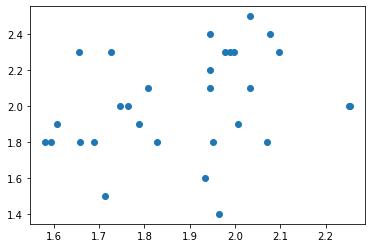

In [163]:
# predict values on test data: gets the same result
print('coefficients ' + str(reg.coef_))

predictions = reg.predict(np.array(test_input))
plt.scatter(predictions, test_labs)

for_cov = np.c_[predictions.astype(float), test_labs.astype(float)]
print('r squared of ' + str(np.cov(for_cov, rowvar=False)[0, 1]**2))